In [1]:
# Author: Sumanyu Muku and Pascal Wallisch

# Lab 11: Unsupervised Learning

## Table of Contents:
* [Eigendecomposition](#zero-bullet)
* [Singular Vector Decomposition](#first-bullet)
* [Principal Component Analysis](#second-bullet)
* [K-Means](#third-bullet)
* [DBSCAN](#fourth-bullet)

### Import Libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import requests
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KMeans, DBSCAN as DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.pipeline import Pipeline
sns.set()
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

## 1. Eigendecomposition <a class="anchor" id="zero-bullet"></a>

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let's see what are eigenvectors and eigenvalues.

#### Matrices as linear transformations

You can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply' the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

In [128]:
# lets import our data
df = pd.read_csv('/Users/caralinebruzinski/src/intro_to_ds/data_sci_capstone_ideas/SES_Covid/data.csv') # data for our MLR model



In [129]:
df

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests,owid_new_tests,owid_new_tests_smoothed,owid_total_tests_per_thousand,owid_new_tests_per_thousand,owid_new_tests_smoothed_per_thousand,owid_tests_per_case,owid_positive_rate,owid_tests_units,owid_stringency_index,owid_weekly_excess_mortality_p_score,owid_weekly_excess_mortality_p_score_0_14,owid_weekly_excess_mortality_p_score_15_64,owid_weekly_excess_mortality_p_score_65_74,owid_weekly_excess_mortality_p_score_75_84,owid_weekly_excess_mortality_p_score_85plus,owid_weekly_deaths_2020,owid_weekly_deaths_2019,owid_weekly_deaths_2018,owid_weekly_deaths_2017,owid_weekly_deaths_2016,owid_weekly_deaths_2015,owid_avg_weekly_deaths_2015_2019,owid_population,owid_population_density,owid_median_age,owid_aged_65_older,owid_aged_70_older,owid_gdp_per_capita,owid_extreme_poverty,owid_cardiovasc_death_rate,owid_diabetes_prevalence,owid_female_smokers,owid_male_smokers,owid_handwashing_facilities,owid_hospital_beds_per_thousand,owid_life_expectancy,ox_c1_school_closing,ox_c1_flag,ox_c2_workplace_closing,ox_c2_flag,ox_c3_cancel_public_events,ox_c3_flag,ox_c4_restrictions_on_gatherings,ox_c4_flag,ox_c5_close_public_transport,ox_c5_flag,ox_c6_stay_at_home_requirements,ox_c6_flag,ox_c7_restrictions_on_internal_movement,ox_c7_flag,ox_c8_international_travel_controls,ox_e1_income_support,ox_e1_flag,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h1_flag,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_m1_wildcard,ox_confirmed_cases,ox_confirmed_deaths,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,marioli_effective_reproduction_rate,marioli_ci_65_u,marioli_ci_65_l,marioli_ci_95_u,marioli_ci_95_l,yougov_fear_of_catching,yougov_government_handling,yougov_avoiding_crowded_places,yougov_wearing_mask_in_public,yougov_avoiding_going_to_work,yougov_avoiding_raw_meat,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,yougov_support_stopping_flights_from_china,yougov_support_quarantine_flights_from_china,yougov_support_stopping_international_flights,yougov_support_quarantine_international_flights,yougov_support_quarantine_chinese_travellers,yougov_support_quarantine_any_person,yougov_support_quarantine_any_location,yougov_support_free_masks,yougov_support_work_from_home,yougov_support_temporarily_close_schools,yougov_support_cancel_large_events,yougov_support_cancel_hospital_routines,yougov_confidence_in_health_authorities,yougov_perceived_national_improvement,yougov_perceived_global_improvement,yougov_international_happiness,yougov_personal_health_fears,yougov_friends_and_family_health_fears,yougov_finances_fears,yougov_job_loss_fears,yougov_education_fears,yougov_social_impact_fears,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,

In [ ]:
# lets take a look at the poorer countries, or rather, can we look at the countries which have the most NAa

In [81]:
nan_count = df.isna().sum()

In [86]:
pd.set_option('display.max_rows', None)
pd.option_context('display.max_columns', 138)

In [87]:
df.groupby('iso_code').count().rsub(df.groupby('iso_code').size(), axis=0)

,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,304,304,304,82,82,106,82,82,...,75,75,75,72,56,88,88,304,304,220
AFG,0,0,23,23,23,66,10,84,10,66,...,96,99,121,96,96,13,13,101,305,305
AGO,0,0,22,22,22,81,81,89,81,81,...,75,75,50,50,50,87,87,175,304,304
AIA,0,0,304,304,304,86,86,304,86,86,...,304,304,304,304,304,92,92,304,304,304
ALB,0,0,22,22,22,68,68,71,68,68,...,304,304,304,304,304,74,74,96,304,302
AND,0,0,22,22,22,73,73,86,73,73,...,304,304,304,304,304,80,80,95,304,202
ARE,0,0,23,23,23,33,6,82,6,33,...,51,51,51,51,51,6,6,92,36,36
ARG,0,0,22,22,22,66,66,69,66,66,...,50,50,50,50,50,72,72,93,304,209
ARM,0,0,23,23,23,70,9,87,9,70,...,305,305,305,305,305,14,14,93,305,209


In [ ]:
# check out the poorest countries

In [130]:
gdp_df = df[['country', 'iso_code', 'owid_gdp_per_capita']].copy()

In [131]:
gdp_df = gdp_df[gdp_df['owid_gdp_per_capita'].notna()]

In [132]:
gdp_df = gdp_df.drop_duplicates()
gdp_df

,country,iso_code,owid_gdp_per_capita
72,Aruba,ABW,35973.781
304,Afghanistan,AFG,1803.987
690,Angola,AGO,5819.495
1285,Albania,ALB,11803.431
1825,United Arab Emirates,ARE,67293.483
2193,Argentina,ARG,18933.907
2434,Armenia,ARM,8787.580
2792,Antigua and Barbuda,ATG,21490.943
3022,Australia,AUS,44648.710
3327,Austria,AUT,45436.686


In [133]:
# gdp_df.info
gdp_df.describe() # this is the description of all countries GDP column

,owid_gdp_per_capita
count,184.000000
mean,19359.517717
std,19828.292031
min,661.240000
25%,4394.331000
50%,13031.526500
75%,28143.439750
max,116935.600000


In [134]:
# rename the imputed cols
gdp_df.rename(columns={"owid_gdp_per_capita": "imputed_owid_gdp_per_capita"})

,country,iso_code,imputed_owid_gdp_per_capita
72,Aruba,ABW,35973.781
304,Afghanistan,AFG,1803.987
690,Angola,AGO,5819.495
1285,Albania,ALB,11803.431
1825,United Arab Emirates,ARE,67293.483
2193,Argentina,ARG,18933.907
2434,Armenia,ARM,8787.580
2792,Antigua and Barbuda,ATG,21490.943
3022,Australia,AUS,44648.710
3327,Austria,AUT,45436.686


In [145]:
# ASIDE: impute GDP, some rows (ARUBA) have GDP filled in one day, and not the next.
# left join this gdp dataframe with the original dataframe, use imputed_GDP and see if there are differences.

imputed_df = df.copy()
imputed_df = imputed_df.merge(gdp_df, on='iso_code', how='left')

# left_df.merge(right_df, on='user_id', how='left')


In [136]:
pd.set_option('display.max_rows', 500)

In [137]:
pd.set_option('display.max_columns', 500)

In [138]:
imputed_df.columns.tolist()

['iso_code',
 'country_x',
 'date',
 'jhu_confirmed',
 'jhu_deaths',
 'jhu_recovered',
 'owid_total_cases',
 'owid_new_cases',
 'owid_total_deaths',
 'owid_new_deaths',
 'owid_total_cases_per_million',
 'owid_new_cases_per_million',
 'owid_total_deaths_per_million',
 'owid_new_deaths_per_million',
 'owid_total_tests',
 'owid_new_tests',
 'owid_new_tests_smoothed',
 'owid_total_tests_per_thousand',
 'owid_new_tests_per_thousand',
 'owid_new_tests_smoothed_per_thousand',
 'owid_tests_per_case',
 'owid_positive_rate',
 'owid_tests_units',
 'owid_stringency_index',
 'owid_weekly_excess_mortality_p_score',
 'owid_weekly_excess_mortality_p_score_0_14',
 'owid_weekly_excess_mortality_p_score_15_64',
 'owid_weekly_excess_mortality_p_score_65_74',
 'owid_weekly_excess_mortality_p_score_75_84',
 'owid_weekly_excess_mortality_p_score_85plus',
 'owid_weekly_deaths_2020',
 'owid_weekly_deaths_2019',
 'owid_weekly_deaths_2018',
 'owid_weekly_deaths_2017',
 'owid_weekly_deaths_2016',
 'owid_weekly_de

In [139]:
# observe the inequality
imputed_df.query('owid_gdp_per_capita_x != owid_gdp_per_capita_y') 

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests,owid_new_tests,owid_new_tests_smoothed,owid_total_tests_per_thousand,owid_new_tests_per_thousand,owid_new_tests_smoothed_per_thousand,owid_tests_per_case,owid_positive_rate,owid_tests_units,owid_stringency_index,owid_weekly_excess_mortality_p_score,owid_weekly_excess_mortality_p_score_0_14,owid_weekly_excess_mortality_p_score_15_64,owid_weekly_excess_mortality_p_score_65_74,owid_weekly_excess_mortality_p_score_75_84,owid_weekly_excess_mortality_p_score_85plus,owid_weekly_deaths_2020,owid_weekly_deaths_2019,owid_weekly_deaths_2018,owid_weekly_deaths_2017,owid_weekly_deaths_2016,owid_weekly_deaths_2015,owid_avg_weekly_deaths_2015_2019,owid_population,owid_population_density,owid_median_age,owid_aged_65_older,owid_aged_70_older,owid_gdp_per_capita_x,owid_extreme_poverty,owid_cardiovasc_death_rate,owid_diabetes_prevalence,owid_female_smokers,owid_male_smokers,owid_handwashing_facilities,owid_hospital_beds_per_thousand,owid_life_expectancy,ox_c1_school_closing,ox_c1_flag,ox_c2_workplace_closing,ox_c2_flag,ox_c3_cancel_public_events,ox_c3_flag,ox_c4_restrictions_on_gatherings,ox_c4_flag,ox_c5_close_public_transport,ox_c5_flag,ox_c6_stay_at_home_requirements,ox_c6_flag,ox_c7_restrictions_on_internal_movement,ox_c7_flag,ox_c8_international_travel_controls,ox_e1_income_support,ox_e1_flag,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h1_flag,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_m1_wildcard,ox_confirmed_cases,ox_confirmed_deaths,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,marioli_effective_reproduction_rate,marioli_ci_65_u,marioli_ci_65_l,marioli_ci_95_u,marioli_ci_95_l,yougov_fear_of_catching,yougov_government_handling,yougov_avoiding_crowded_places,yougov_wearing_mask_in_public,yougov_avoiding_going_to_work,yougov_avoiding_raw_meat,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,yougov_support_stopping_flights_from_china,yougov_support_quarantine_flights_from_china,yougov_support_stopping_international_flights,yougov_support_quarantine_international_flights,yougov_support_quarantine_chinese_travellers,yougov_support_quarantine_any_person,yougov_support_quarantine_any_location,yougov_support_free_masks,yougov_support_work_from_home,yougov_support_temporarily_close_schools,yougov_support_cancel_large_events,yougov_support_cancel_hospital_routines,yougov_confidence_in_health_authorities,yougov_perceived_national_improvement,yougov_perceived_global_improvement,yougov_international_happiness,yougov_personal_health_fears,yougov_friends_and_family_health_fears,yougov_finances_fears,yougov_job_loss_fears,yougov_education_fears,yougov_social_impact_fears,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission,country_y,owid_gdp_per_capita_y
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# jeeze, okay.

In [146]:
# well, how about try the column deletion now?
imputed_df

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests,owid_new_tests,owid_new_tests_smoothed,owid_total_tests_per_thousand,owid_new_tests_per_thousand,owid_new_tests_smoothed_per_thousand,owid_tests_per_case,owid_positive_rate,owid_tests_units,owid_stringency_index,owid_weekly_excess_mortality_p_score,owid_weekly_excess_mortality_p_score_0_14,owid_weekly_excess_mortality_p_score_15_64,owid_weekly_excess_mortality_p_score_65_74,owid_weekly_excess_mortality_p_score_75_84,owid_weekly_excess_mortality_p_score_85plus,owid_weekly_deaths_2020,owid_weekly_deaths_2019,owid_weekly_deaths_2018,owid_weekly_deaths_2017,owid_weekly_deaths_2016,owid_weekly_deaths_2015,owid_avg_weekly_deaths_2015_2019,owid_population,owid_population_density,owid_median_age,owid_aged_65_older,owid_aged_70_older,owid_gdp_per_capita_x,owid_extreme_poverty,owid_cardiovasc_death_rate,owid_diabetes_prevalence,owid_female_smokers,owid_male_smokers,owid_handwashing_facilities,owid_hospital_beds_per_thousand,owid_life_expectancy,ox_c1_school_closing,ox_c1_flag,ox_c2_workplace_closing,ox_c2_flag,ox_c3_cancel_public_events,ox_c3_flag,ox_c4_restrictions_on_gatherings,ox_c4_flag,ox_c5_close_public_transport,ox_c5_flag,ox_c6_stay_at_home_requirements,ox_c6_flag,ox_c7_restrictions_on_internal_movement,ox_c7_flag,ox_c8_international_travel_controls,ox_e1_income_support,ox_e1_flag,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h1_flag,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_m1_wildcard,ox_confirmed_cases,ox_confirmed_deaths,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,marioli_effective_reproduction_rate,marioli_ci_65_u,marioli_ci_65_l,marioli_ci_95_u,marioli_ci_95_l,yougov_fear_of_catching,yougov_government_handling,yougov_avoiding_crowded_places,yougov_wearing_mask_in_public,yougov_avoiding_going_to_work,yougov_avoiding_raw_meat,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,yougov_support_stopping_flights_from_china,yougov_support_quarantine_flights_from_china,yougov_support_stopping_international_flights,yougov_support_quarantine_international_flights,yougov_support_quarantine_chinese_travellers,yougov_support_quarantine_any_person,yougov_support_quarantine_any_location,yougov_support_free_masks,yougov_support_work_from_home,yougov_support_temporarily_close_schools,yougov_support_cancel_large_events,yougov_support_cancel_hospital_routines,yougov_confidence_in_health_authorities,yougov_perceived_national_improvement,yougov_perceived_global_improvement,yougov_international_happiness,yougov_personal_health_fears,yougov_friends_and_family_health_fears,yougov_finances_fears,yougov_job_loss_fears,yougov_education_fears,yougov_social_impact_fears,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission,country_y,owid_gdp_per_capita_y
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [152]:
# if a row is mostly nulls, just remove it 

row_width = len(df.columns)
row_threshold = row_width * 0.1
row_threshold

#so, ill say a row has to have 14 values at least which are not NaN

13.8

In [153]:
# remove those rows
imputed_df = imputed_df.dropna(thresh=row_threshold, axis=0)

In [154]:
imputed_df

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests,owid_new_tests,owid_new_tests_smoothed,owid_total_tests_per_thousand,owid_new_tests_per_thousand,owid_new_tests_smoothed_per_thousand,owid_tests_per_case,owid_positive_rate,owid_tests_units,owid_stringency_index,owid_weekly_excess_mortality_p_score,owid_weekly_excess_mortality_p_score_0_14,owid_weekly_excess_mortality_p_score_15_64,owid_weekly_excess_mortality_p_score_65_74,owid_weekly_excess_mortality_p_score_75_84,owid_weekly_excess_mortality_p_score_85plus,owid_weekly_deaths_2020,owid_weekly_deaths_2019,owid_weekly_deaths_2018,owid_weekly_deaths_2017,owid_weekly_deaths_2016,owid_weekly_deaths_2015,owid_avg_weekly_deaths_2015_2019,owid_population,owid_population_density,owid_median_age,owid_aged_65_older,owid_aged_70_older,owid_gdp_per_capita_x,owid_extreme_poverty,owid_cardiovasc_death_rate,owid_diabetes_prevalence,owid_female_smokers,owid_male_smokers,owid_handwashing_facilities,owid_hospital_beds_per_thousand,owid_life_expectancy,ox_c1_school_closing,ox_c1_flag,ox_c2_workplace_closing,ox_c2_flag,ox_c3_cancel_public_events,ox_c3_flag,ox_c4_restrictions_on_gatherings,ox_c4_flag,ox_c5_close_public_transport,ox_c5_flag,ox_c6_stay_at_home_requirements,ox_c6_flag,ox_c7_restrictions_on_internal_movement,ox_c7_flag,ox_c8_international_travel_controls,ox_e1_income_support,ox_e1_flag,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h1_flag,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_m1_wildcard,ox_confirmed_cases,ox_confirmed_deaths,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,marioli_effective_reproduction_rate,marioli_ci_65_u,marioli_ci_65_l,marioli_ci_95_u,marioli_ci_95_l,yougov_fear_of_catching,yougov_government_handling,yougov_avoiding_crowded_places,yougov_wearing_mask_in_public,yougov_avoiding_going_to_work,yougov_avoiding_raw_meat,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,yougov_support_stopping_flights_from_china,yougov_support_quarantine_flights_from_china,yougov_support_stopping_international_flights,yougov_support_quarantine_international_flights,yougov_support_quarantine_chinese_travellers,yougov_support_quarantine_any_person,yougov_support_quarantine_any_location,yougov_support_free_masks,yougov_support_work_from_home,yougov_support_temporarily_close_schools,yougov_support_cancel_large_events,yougov_support_cancel_hospital_routines,yougov_confidence_in_health_authorities,yougov_perceived_national_improvement,yougov_perceived_global_improvement,yougov_international_happiness,yougov_personal_health_fears,yougov_friends_and_family_health_fears,yougov_finances_fears,yougov_job_loss_fears,yougov_education_fears,yougov_social_impact_fears,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission,country_y,owid_gdp_per_capita_y
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [157]:
# now, consider column values
# when columns are 75% NaN, remove them
col_length = len(imputed_df)
col_threshold = col_length * 0.75
col_threshold

48506.25

In [ ]:
# at 0.1, a column must have at least 6,400 values out of 62,984 in order to stay 
# at 0.25, a column must have at least 16,168 values out of 62,984 in order to stay
# at 0.75, a column must have at least 48,506 values out of 62,984 in order to stay

In [158]:
imputed_df = imputed_df.dropna(thresh=col_threshold, axis=1)

In [161]:
imputed_df

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
1,ABW,Aruba,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
2,ABW,Aruba,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
3,ABW,Aruba,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
4,ABW,Aruba,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775
64673,ABW,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,0.0,559.782,0.336,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.052786,Zimbabwe,1899.775


In [ ]:
# 47 columns remain. i think this is much better for me to work with
# i screwed something up with the merge, 

# it put aruba iso code into zimbabwe, not good.

In [165]:
# aruba_df = imputed_df['iso_code'] = 'ABW'
# df.loc[df['column_name'] == some_value]

imputed_df.loc[imputed_df['country_x'] == 'Aruba']

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
1,ABW,Aruba,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
2,ABW,Aruba,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
3,ABW,Aruba,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
4,ABW,Aruba,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
5,ABW,Aruba,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
6,ABW,Aruba,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
7,ABW,Aruba,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
8,ABW,Aruba,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781
9,ABW,Aruba,2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Aruba,35973.781


In [ ]:
# i think i should re-apply my row threshold now that ive cut some columns because there are still a bunch of null
# here across the row

In [174]:
row_width = len(imputed_df.columns)
row_threshold = row_width * 0.75
row_threshold
    # the row has to have more than 50 percent of it being non NaNs, dropped it to 55K rows
        # didnt solve my problem, try with 70 percent now, remaining is 50K rows
        # do it again with 75&, remaining is 43,710. this is a number im a bit more comfortable with.

35.25

In [175]:
# remove those rows
imputed_df = imputed_df.dropna(thresh=row_threshold, axis=0)

In [176]:
imputed_df

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,0.0,18.733,18.733,0.000,106766.0,584.800,11.62,76.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2.38,2.38,2.78,2.78,0.0,0.0,NaN,NaN,Aruba,35973.781
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,11.62,76.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,33.33,33.33,42.86,42.86,27.38,27.38,31.94,31.94,0.0,0.0,NaN,NaN,Aruba,35973.781
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,0.0,37.465,18.733,0.000,106766.0,584.800,11.62,76.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,33.33,33.33,42.86,42.86,27.38,27.38,31.94,31.94,0.0,0.0,NaN,NaN,Aruba,35973.781
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,ABW,Zimbabwe,2020-10-25,8276.0,237.0,7797.0,8269.0,12.0,0.0,556.351,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,57.14,57.14,62.50,62.50,25.0,25.0,1.244643,0.028786,Zimbabwe,1899.775
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775


In [177]:
# did that solve my issue with aruba?
imputed_df.loc[imputed_df['country_x'] == 'Aruba']

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,0.0,18.733,18.733,0.000,106766.0,584.8,11.62,76.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2.38,2.38,2.78,2.78,0.0,0.0,NaN,NaN,Aruba,35973.781
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,11.62,76.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,33.33,33.33,42.86,42.86,27.38,27.38,31.94,31.94,0.0,0.0,NaN,NaN,Aruba,35973.781
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,0.0,37.465,18.733,0.000,106766.0,584.8,11.62,76.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,33.33,33.33,42.86,42.86,27.38,27.38,31.94,31.94,0.0,0.0,NaN,NaN,Aruba,35973.781
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
82,ABW,Aruba,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
83,ABW,Aruba,2020-03-24,NaN,NaN,NaN,12.0,8.0,0.0,112.395,74.930,0.000,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
84,ABW,Aruba,2020-03-25,NaN,NaN,NaN,17.0,5.0,0.0,159.227,46.831,0.000,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
85,ABW,Aruba,2020-03-26,NaN,NaN,NaN,19.0,2.0,0.0,177.959,18.733,0.000,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
86,ABW,Aruba,2020-03-27,NaN,NaN,NaN,28.0,9.0,0.0,262.256,84.296,0.000,106766.0,584.8,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.00,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781


In [186]:
# figure out who the poor ones are
imputed_df['owid_gdp_per_capita_y'].describe()

count     41624.000000
mean      21047.525345
std       21030.602963
min         661.240000
25%        5034.708000
50%       13913.839000
75%       32605.906000
max      116935.600000
Name: owid_gdp_per_capita_y, dtype: float64

In [188]:
# let's actually consider the poorer countries and figure this out
# which columsn do the poor countries definitely report on?

# condition with df.values property
mask = imputed_df['owid_gdp_per_capita_y'].values <= 4394.331000 # lower 25 percentil
 
# new dataframe
df_new = imputed_df[mask]
df_new = df_new.drop_duplicates()
 
lower_pct_list = df_new['country_y']
lower_pct_list = lower_pct_list.drop_duplicates()

lower_pct_list.tolist()
lower_pct_list

305                   Afghanistan
4028                      Burundi
4622                        Benin
5132                 Burkina Faso
5428                   Bangladesh
9679     Central African Republic
11198               Cote d'Ivoire
11497                    Cameroon
11805            Congo, Dem. Rep.
15365                    Djibouti
17501                     Eritrea
18689                    Ethiopia
21589                       Ghana
22198                      Guinea
22506                 Gambia, The
26095                       Haiti
30795                       Kenya
31112             Kyrgyz Republic
31339                    Cambodia
33221                     Liberia
34759                     Lesotho
37139                  Madagascar
38624                        Mali
40313                  Mozambique
40609                  Mauritania
41535                      Malawi
42664                       Niger
44108                       Nepal
46553            Papua New Guinea
50045         

In [190]:
imputed_df.loc[imputed_df['country_y'].isin(lower_pct_list)]

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
305,ABW,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
306,ABW,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
307,ABW,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
308,ABW,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
309,ABW,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,ABW,Zimbabwe,2020-10-25,8276.0,237.0,7797.0,8269.0,12.0,0.0,556.351,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,57.14,57.14,62.50,62.50,25.0,25.0,1.244643,0.028786,Zimbabwe,1899.775
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775


In [ ]:
# 9,000 rows for the poorest countries.


In [191]:
df_low = imputed_df.loc[imputed_df['country_y'].isin(lower_pct_list)]

In [192]:
df_low

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
305,ABW,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
306,ABW,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
307,ABW,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
308,ABW,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
309,ABW,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,Afghanistan,1803.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,ABW,Zimbabwe,2020-10-25,8276.0,237.0,7797.0,8269.0,12.0,0.0,556.351,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,57.14,57.14,62.50,62.50,25.0,25.0,1.244643,0.028786,Zimbabwe,1899.775
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.3,71.3,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775


In [193]:
# this represents the amount of nulls in these columns for the low gdp countries
# i should consider handling the ones which are missing a couple, and remove entirely the rows which have higher

# sdsn_new_cases_per_million_smoothed
# sdsn_new_deaths_per_million_smoothed
# owid_total_cases
# owid_total_cases_per_million
# owid_population_density

#honestly, it's really not so many. i bet i can just remove those rows and be fine.


df_low.isna().sum()

iso_code                                      0
country_x                                     0
date                                          0
jhu_confirmed                                63
jhu_deaths                                   63
jhu_recovered                                63
owid_total_cases                            187
owid_new_cases                               81
owid_new_deaths                              81
owid_total_cases_per_million                187
owid_new_cases_per_million                   81
owid_new_deaths_per_million                  81
owid_population                               0
owid_population_density                     200
owid_diabetes_prevalence                      0
owid_life_expectancy                          0
ox_c1_school_closing                          1
ox_c2_workplace_closing                       0
ox_c3_cancel_public_events                   17
ox_c4_restrictions_on_gatherings              1
ox_c5_close_public_transport            

In [194]:
df_low.dropna()

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
360,ABW,Afghanistan,2020-02-25,1.0,0.0,0.0,1.0,1.0,0.0,0.026,0.026,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
361,ABW,Afghanistan,2020-02-26,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
362,ABW,Afghanistan,2020-02-27,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
363,ABW,Afghanistan,2020-02-28,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
364,ABW,Afghanistan,2020-02-29,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,ABW,Zimbabwe,2020-10-25,8276.0,237.0,7797.0,8269.0,12.0,0.0,556.351,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,57.14,57.14,62.50,62.50,25.0,25.0,1.244643,0.028786,Zimbabwe,1899.775
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775


In [ ]:
# amazing, i still have so many rows. i might as well keep my method and move forward with this for the rest of the
# overall stuf..

In [196]:
reduced_data = imputed_df.copy()

In [197]:
reduced_data

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,0.0,18.733,18.733,0.000,106766.0,584.800,11.62,76.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2.38,2.38,2.78,2.78,0.0,0.0,NaN,NaN,Aruba,35973.781
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,11.62,76.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,33.33,33.33,42.86,42.86,27.38,27.38,31.94,31.94,0.0,0.0,NaN,NaN,Aruba,35973.781
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,0.0,37.465,18.733,0.000,106766.0,584.800,11.62,76.29,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,33.33,33.33,42.86,42.86,27.38,27.38,31.94,31.94,0.0,0.0,NaN,NaN,Aruba,35973.781
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106766.0,584.800,11.62,76.29,3.0,2.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,44.44,44.44,60.71,60.71,34.52,34.52,40.28,40.28,0.0,0.0,NaN,NaN,Aruba,35973.781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,ABW,Zimbabwe,2020-10-25,8276.0,237.0,7797.0,8269.0,12.0,0.0,556.351,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,57.14,57.14,62.50,62.50,25.0,25.0,1.244643,0.028786,Zimbabwe,1899.775
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775


In [198]:
reduced_data.dropna()

,iso_code,country_x,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_new_deaths_per_million,owid_population,owid_population_density,owid_diabetes_prevalence,owid_life_expectancy,ox_c1_school_closing,ox_c2_workplace_closing,ox_c3_cancel_public_events,ox_c4_restrictions_on_gatherings,ox_c5_close_public_transport,ox_c6_stay_at_home_requirements,ox_c7_restrictions_on_internal_movement,ox_c8_international_travel_controls,ox_e1_income_support,ox_e2_debt_or_contract_relief,ox_e3_fiscal_measures,ox_e4_international_support,ox_h1_public_information_campaigns,ox_h2_testing_policy,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,ox_stringency_index,ox_stringency_index_for_display,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,country_y,owid_gdp_per_capita_y
360,ABW,Afghanistan,2020-02-25,1.0,0.0,0.0,1.0,1.0,0.0,0.026,0.026,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
361,ABW,Afghanistan,2020-02-26,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
362,ABW,Afghanistan,2020-02-27,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
363,ABW,Afghanistan,2020-02-28,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
364,ABW,Afghanistan,2020-02-29,1.0,0.0,0.0,1.0,0.0,0.0,0.026,0.000,0.000,38928341.0,54.422,9.59,64.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.33,8.33,10.71,10.71,11.31,11.31,13.19,13.19,0.0,0.0,0.001857,0.000000,Afghanistan,1803.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64669,ABW,Zimbabwe,2020-10-25,8276.0,237.0,7797.0,8269.0,12.0,0.0,556.351,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,57.14,57.14,62.50,62.50,25.0,25.0,1.244643,0.028786,Zimbabwe,1899.775
64670,ABW,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,1.0,556.822,0.471,0.067,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,3800000.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571,Zimbabwe,1899.775
64671,ABW,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,5.0,558.638,1.817,0.336,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571,Zimbabwe,1899.775
64672,ABW,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,0.0,559.446,0.807,0.000,14862927.0,42.729,1.82,61.49,2.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,71.30,71.30,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571,Zimbabwe,1899.775


In [ ]:
# 36,603 rows and i am officially ok with this :D

In [ ]:
# before i can do PCA i have to assign a class name to my data. 

# make the bins and create the classes.

# thats incorrect, we do dimensionality reduction as an unsupervised learning method. that is, there are no classes.
# right? so confusing.....

# do dimensionality reduction, and then what? lol


In [200]:
# ## Do PCA and plot the features. Since there are three types of iris, ideally we should be able to see 3 well seperated clusters
# pca=PCA()
# X_transformed=pca.transform(StandardScaler().fit_transform(X), 2)

# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(reduced_data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])



ValueError: Expected 2D array, got 1D array instead:
array=[nan nan nan ... nan nan nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [119]:
# remove mostly empty rows
# there is a lot              # this means that the column has to have more than 69 non-Null values to survive
N_r = len(df.columns)*0.50 
N_r

69.0

In [51]:
# if i want to say, a column has to have 75% non-NaNs to survive, what would this look like?
# N1 = len(df)*0.75

# for removing columns
N_c = len(df)*0.90 # too much, maybe i should remove rows which are all nulls, first.
N_c

58207.5

In [76]:
# for removing rows
# N_r = len(df.columns)*0.80 # only 71 rows remain in the dataset after
# N_r = len(df.columns)*0.70 # only 1164 rows remain in the dataset after
N_r = len(df.columns)*0.60 # 18,709 rows remain in the dataset after this. but it will be low for poor country right?

N_r


82.8

In [77]:
# remove rows which have more more than 138-124 nulls (if the row has 14 nulls it gets dropped)
# a row has to have more than 124 non-NANs to survive
df = df.dropna(thresh=N_r, axis=0)

# new_data = df.dropna(axis = 0,thresh=3)

In [78]:
df

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
1904,ARE,United Arab Emirates,2020-03-19,140.0,0.0,31.0,113.0,0.0,NaN,0.0,...,-26.0,-31.0,-24.0,11.0,-12.0,0.869600,0.000000,NaN,0.001,1.0
1906,ARE,United Arab Emirates,2020-03-21,153.0,2.0,38.0,140.0,0.0,NaN,0.0,...,-37.0,-42.0,-32.0,10.0,-8.0,1.020364,0.000000,NaN,0.001,1.0
1908,ARE,United Arab Emirates,2020-03-23,198.0,2.0,38.0,153.0,0.0,2.0,0.0,...,-38.0,-46.0,-27.0,14.0,-20.0,0.910000,0.016833,NaN,0.001,1.0
1909,ARE,United Arab Emirates,2020-03-24,248.0,2.0,45.0,198.0,45.0,2.0,0.0,...,-43.0,-53.0,-39.0,17.0,-28.0,1.171167,0.016833,NaN,0.002,1.0
1910,ARE,United Arab Emirates,2020-03-25,333.0,2.0,52.0,248.0,50.0,2.0,0.0,...,-47.0,-60.0,-50.0,21.0,-35.0,1.466000,0.016833,1.707328,0.002,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64665,ZWE,Zimbabwe,2020-10-21,8215.0,236.0,7725.0,8187.0,28.0,233.0,1.0,...,23.0,3.0,1.0,11.0,1.0,1.307143,0.019143,0.941157,0.032,1.0
64666,ZWE,Zimbabwe,2020-10-22,8242.0,236.0,7742.0,8215.0,28.0,236.0,3.0,...,25.0,4.0,6.0,9.0,0.0,1.422500,0.033571,0.941803,0.034,1.0
64667,ZWE,Zimbabwe,2020-10-23,8257.0,236.0,7771.0,8242.0,27.0,236.0,0.0,...,32.0,0.0,6.0,8.0,3.0,1.398500,0.033571,0.942107,0.033,1.0
64668,ZWE,Zimbabwe,2020-10-24,8269.0,236.0,7785.0,8257.0,15.0,236.0,0.0,...,35.0,3.0,8.0,3.0,12.0,1.263929,0.033571,NaN,0.032,1.0


In [39]:
# a column has to be more than 75% full data to make it through
# thresh=N requires that a column has at least N non-NaNs to survive



# df = df.dropna(thresh=0.99 * len(df.columns), axis=1)
# df = df.dropna(thresh=N1, axis=1)



In [40]:
df

,iso_code,country,date
0,ABW,Aruba,2020-01-01
1,ABW,Aruba,2020-01-02
2,ABW,Aruba,2020-01-03
3,ABW,Aruba,2020-01-04
4,ABW,Aruba,2020-01-05
...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26
64671,ZWE,Zimbabwe,2020-10-27
64672,ZWE,Zimbabwe,2020-10-28
64673,ZWE,Zimbabwe,2020-10-29


In [7]:
for i in df.columns:
    print(i)

iso_code
country
date
jhu_confirmed
jhu_deaths
jhu_recovered
owid_total_cases
owid_new_cases
owid_total_deaths
owid_new_deaths
owid_total_cases_per_million
owid_new_cases_per_million
owid_total_deaths_per_million
owid_new_deaths_per_million
owid_total_tests
owid_new_tests
owid_new_tests_smoothed
owid_total_tests_per_thousand
owid_new_tests_per_thousand
owid_new_tests_smoothed_per_thousand
owid_tests_per_case
owid_positive_rate
owid_tests_units
owid_stringency_index
owid_weekly_excess_mortality_p_score
owid_weekly_excess_mortality_p_score_0_14
owid_weekly_excess_mortality_p_score_15_64
owid_weekly_excess_mortality_p_score_65_74
owid_weekly_excess_mortality_p_score_75_84
owid_weekly_excess_mortality_p_score_85plus
owid_weekly_deaths_2020
owid_weekly_deaths_2019
owid_weekly_deaths_2018
owid_weekly_deaths_2017
owid_weekly_deaths_2016
owid_weekly_deaths_2015
owid_avg_weekly_deaths_2015_2019
owid_population
owid_population_density
owid_median_age
owid_aged_65_older
owid_aged_70_older
owid_gd

In [8]:


# data_df.fillna(0) # this didnt work i think??
# # data_df.dropna(inplace=True) # still needed this line to drop the nans

In [9]:
data_df = df.copy()
data_df

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.033571,NaN,0.023,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.355214,0.057571,NaN,0.025,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.340786,0.057571,NaN,0.023,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.052786,NaN,0.023,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fec21c1c070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fec21c16820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fec21c1c310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fec21c16400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fec212f8280>],
 'means': []}

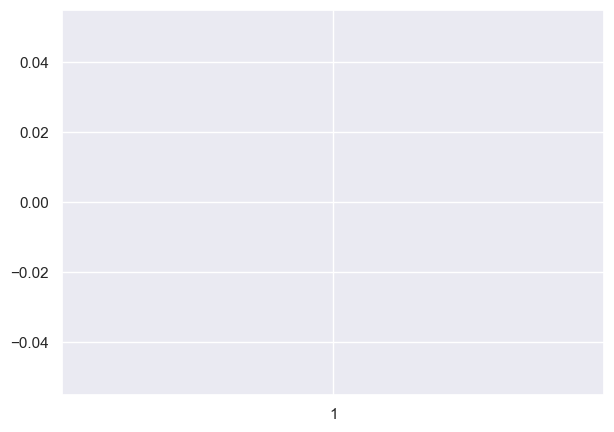

In [20]:


# # # data_df.boxplot(column=['google_mobility_change_parks'])
# # x = data_df['jhu_confirmed'].values
# x = data_df['google_mobility_change_parks'].values

# plt.boxplot(x)

In [22]:
df.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [14]:
# make a copy of previous DF and drop 63 cols which were more than 50% nan
df_more_full = df.copy()
# df_more_full = df_more_full.drop(fify_pct_nulls, axis = 1, inplace = True)


In [15]:
df_more_full
df_more_full.drop(fify_pct_nulls, axis = 1, inplace = True)
df_more_full

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed
0,ABW,Aruba,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
1,ABW,Aruba,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
2,ABW,Aruba,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
3,ABW,Aruba,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
4,ABW,Aruba,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571
64671,ZWE,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571
64672,ZWE,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571
64673,ZWE,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.052786


In [16]:
# # now, first step we can try to analyze this data?
# sns.pairplot(df_more_full, height=1.5)
# plt.show()
# sns.heatmap(df_more_full.corr(), annot=True)
# plt.show()

In [17]:
# with pd.option_context('display.max_columns', 138):
#     print(df.isna().sum())

In [18]:
# get the numeric columns in a matrix
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df_more_full.select_dtypes(include=numerics)
newdf

,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,...,ox_stringency_legacy_index,ox_stringency_legacy_index_for_display,ox_government_response_index,ox_government_response_index_for_display,ox_containment_health_index,ox_containment_health_index_for_display,ox_economic_support_index,ox_economic_support_index_for_display,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,556.822,0.471,15.946,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.033571
64671,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,558.638,1.817,16.282,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.355214,0.057571
64672,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,559.446,0.807,16.282,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.340786,0.057571
64673,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,559.782,0.336,16.282,...,77.38,77.38,60.71,60.71,66.67,66.67,25.0,25.0,1.273500,0.052786


In [21]:
# you can not do eigendecomposition if the matrix is not square
# use svd instead

# # get the eigs
A = newdf.copy()
# # Lets get the eigenvalues of the matrix used above. We use the eig function found in np.linalg
# eigenVals, eigenVecs = np.linalg.eig(A)
# print("Number of eigenvalues of A: ", len(eigenVals))

In [ ]:
# A has been decomposed using SVD
U, sigma, V = np.linalg.svd(A)

In [ ]:
# Check if matrix multiplication of decomposed matrices gives original matrix.
s=np.zeros_like(A, dtype=float)
np.fill_diagonal(s, sigma)
np.allclose(A, U@s@V)

#### Eigenvectors and eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix didn't change the direction of the vector. This special vector is called an eigenvector of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

<span class='pquote'>
    Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an eigenvector of $\bs{A}$.
</span>

This means that $\bs{v}$ is a eigenvector of $\bs{A}$ if $\bs{v}$ and $\bs{Av}$ are in the same direction or to rephrase it if the vectors $\bs{Av}$ and $\bs{v}$ are parallel. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ which is called the **eigenvalue** of $\bs{A}$.

$$
\bs{Av} = \lambda\bs{v}
$$

In [ ]:
# Lets get the eigenvalues of the matrix used above. We use the eig function found in np.linalg
eigenVals, eigenVecs = np.linalg.eig(A)
print("Number of eigenvalues of A: ", len(eigenVals))



In [ ]:
## Let's plot the eigenvectors and their corresponding product with A matrix
ev1 = eigenVecs[:, 1]
A_ev1=A.dot(ev1)

plotVectors([ev1.flatten(), A_ev1.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

So if all of our eigenvectors for matrix **A** are represented by **Q** matrix and **$\lambda$** is a diagonal matrix containing eigenvalues then:
\begin{equation}
A = Q.\lambda.Q^{-1}
\end{equation}

In [ ]:
## Lets check if it is true
np.allclose(A, eigenVecs@np.diag(eigenVals)@np.linalg.inv(eigenVecs))
## If assertion fails then an assertion error is generated

**Question**: Can you do eigendecomposition for non-square matrices?

No

In the later part of the notebook we will take a look at Principal Component Analysis: one of the use cases of eigen decomposition

## 2. Singular Value Decomposition  <a class="anchor" id="first-bullet"></a>

Singular Value Decomposition is another type of matrix decomposition. The singular value decomposition of an $m\times n$ matrix $M$ is a factorization of the form: 

$$M = U {\Sigma } V^{T} $$

where:


- $U$ is an ${\displaystyle m\times m}$ orthogonal rotation matrix, 

- ${\Sigma }$ is an ${\displaystyle m\times n}$ rectangular diagonal matrix of singular values, and

- $V^{T}$ is an $n\times n$ orthogonal rotation matrix.

he use cases include dimensionality reduction, recommender systems and data compression.

In [ ]:
### You can use svd from np.linalg
A=np.array([[1, 2, 3], [-1, 0, 1]])
A

In [ ]:
# A has been decomposed using SVD
U, sigma, V = np.linalg.svd(A)

In [ ]:
# Check if matrix multiplication of decomposed matrices gives original matrix.
s=np.zeros_like(A, dtype=float)
np.fill_diagonal(s, sigma)
np.allclose(A, U@s@V)

**Question**: Can you state the relationship between singular value decomposition (SVD) and eigendecomposition? Take a matrix mxn matrix **A** as an example? Can you somehow transform it into a square matrix and do eigendecomposition?

- $\bs{U}$ corresponds to the eigenvectors of $\bs{AA}^\text{T}$
- $\bs{V}$ corresponds to the eigenvectors of $\bs{A^\text{T}A}$
- $\bs{\Sigma}$ corresponds to the eigenvalues $\bs{AA}^\text{T}$ or $\bs{A^\text{T}A}$ which are the same.

### SVD for Image Compression

Load image as ${\displaystyle n\times m}$ matrix of [RGB] values and grayscale it so we are left with ${\displaystyle n\times m}$ matrix of pixel intensity values:

In [ ]:
# img = Image.open('fox.jpeg') # load
img = Image.open(requests.get('http://www.nwf.org/-/media/NEW-WEBSITE/Shared-Folder/Wildlife/Mammals/mammal_red-fox-kit-nebraska_william-wiley_600x300.ashx', stream=True).raw)
imggray = img.convert('LA') # grayscale
imgmat = np.array(list(imggray.getdata(band=0)), float) # convert to numpy array
imgmat.shape = (imggray.size[1], imggray.size[0]) # get handle on dimensions
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.grid()
plt.show()

Compute the SVD using NumPy's `np.linalg.eig(A)` function:

In [ ]:
U, S, V = np.linalg.svd(imgmat)
print("img: {}; U: {}; S: {}; V: {}".format(imgmat.shape, U.shape, S.shape, V.shape))

Iterate over number of singular vectors and plot the reconstructed image for each value:

In [ ]:
for i in [5, 10, 25, 50, 100]:
    reconstruct_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    print("img: {}\nU': {}\nS': {}\nV': {}".format(imgmat.shape, U[:, :i].shape, np.diag(S[:i]).shape,V[:i, :].shape))
    print("Memory consumption by original image: {} kB".format(imgmat.nbytes/1000.0))
    print("Memory consumption by compressed image: {} kB".format((U[:, :i].nbytes+S[:i].nbytes+V[:i, :].nbytes)/1000.0))
    print("Compression Ratio: %.3f" % (imgmat.nbytes/(U[:, :i].nbytes+S[:i].nbytes+V[:i, :].nbytes)))
    plt.figure(figsize=(6, 4))
    plt.imshow(reconstruct_img, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.grid()
    plt.show()

## 3. Principal Component Analysis <a class="anchor" id="second-bullet"></a>

Computational goal: to find **Principal Components** that 


- Are linear combinations of the original ones

- Are uncorrelated with one another

- Are orthogonal in original dimension space

- Capture as much of the original variance in the data as possible

In [ ]:
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
        
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [ ]:
## Load Data and Do PCA
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)

In [ ]:
print("Types of iris: ", iris.target_names)

In [ ]:
## Do PCA and plot the features. Since there are three types of iris, ideally we should be able to see 3 well seperated clusters
pca=PCA()
X_transformed=pca.transform(StandardScaler().fit_transform(X), 2)

In [ ]:
target_ids = range(len(iris.target_names))
plt.figure(figsize=(10, 8))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], c=c, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
### Now imagine that there is a dataset with high number of features e.g 1e8. You want to do PCA to reduce the number of dimensions.
### What is number of dimensions that you should reduce to so that much of variance of the data is covered in lower dimension.

In [ ]:
### Load and Print shape of the data
cancer=datasets.load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

In [ ]:
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(cancer.data)

In [ ]:
## Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 30
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

According to Kaiser Criterion we should consider 6 principal components, so the data after dimensionality reduction should be (569, 6) 

**Question**: How much variance is explained by the principal components chosen by Kaiser Criterion above?

In [ ]:
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 6 PCs above is: %.3f " % (sum(covarExplained[:6])))

## 4. K-Means Clustering <a class="anchor" id="third-bullet"></a>

K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

In [ ]:
"""
Bare Bones implementation of KMeans
"""
def KMeans(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
#     print(i.shape)
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [ ]:
### Let's Cluster K-Means for the iris data used above
n_clusters=range(2, 6)
plt.figure(figsize=(18, 12))
for i, c_num in enumerate(n_clusters):
    centers, labels = KMeans(X_transformed, c_num)
    plt.subplot(2, 2, i+1)
    plt.title('K-Means Clustering with n_clusters={}'.format(c_num))
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Set2')
    plt.plot(centers[:, 0], centers[:, 1], '*',markersize=10,color='red')

In [ ]:
### How to choose n_clusters in KMeans when we do not have an idea about class distribution?

#### Silhouette Score
if a(i) is the mean **intraclsuter distance** and b(i) is the mean **intercluster distance** with the nearest neighboring cluster then:
\begin{equation}
s(i) = \frac{b(i)-a(i)}{max(a(i), b(i))}
\end{equation}
s(i) varies from -1 to 1 inclusive.

In [ ]:
## Let's find the optimal number of wines using KMeans and Silhouette Score
df=pd.read_csv('./wine-clustering.csv')
print("Shape of the data: ", df.shape)
df.head()

In [ ]:
wine_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA(n_components=2))])
wine_processed = wine_pca_pipeline.fit_transform(df.values)

In [ ]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(wine_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(wine_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

In [ ]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

The number of wines in the dataset are 3!

In [ ]:
# Lets see a case where KMeans fails
def make_crater (inner_rad=4, outer_rad=4.5, donut_len=2, inner_pts=1000, outer_pts=500, label=False):
    np.random.seed(12)
    # Make the inner core
    radius_core = inner_rad*np.random.random (inner_pts)
    direction_core = 2*np.pi*np.random.random (size=inner_pts)

    # Simulate inner core points
    core_x = radius_core*np.cos (direction_core)
    core_y = radius_core*np.sin (direction_core)
    crater_core = pd.DataFrame ({'x_1': core_x, 'x_2': core_y})
    if label: crater_core['label'] = 0

    # Make the outer ring
    radius_ring = outer_rad + donut_len*np.random.random(outer_pts)
    direction_ring = 2*np.pi*np.random.random(size = outer_pts)

    # Simulate ring points
    ring_x = radius_ring*np.cos(direction_ring)
    ring_y = radius_ring*np.sin(direction_ring)
    crater_ring = pd.DataFrame ({'x_1': ring_x, 'x_2': ring_y})
    if label: crater_ring['label'] = 1

    return pd.concat ([crater_core, crater_ring])


In [ ]:
#### Scatter Plot for KMeans for n_clusters=2
crater_df=make_crater()
crater_kmeans=sk_KMeans(n_clusters=2)
crater_kmeans.fit(crater_df.values)
kmeans_labels=crater_kmeans.predict(crater_df.values)

plt.figure(figsize=(10, 8))
plt.scatter(crater_df.values[:, 0], crater_df.values[:, 1], c=kmeans_labels, cmap='Accent')
plt.title("KMeans for n_clusters=2")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## 5. DBSCAN <a class="anchor" id="fourth-bullet"></a>

#### Neighborhoods

The first important concept in DBSCAN is that of an _$\epsilon$-neighborhood_.

Consider any point $p$. The $\epsilon$-neighborhood of $p$ is the set of all points within a distance of $\epsilon$ from $p$. That is, if $\{\hat{x}_0, \hat{x}_1, \ldots, \hat{x}_{m-1}\}$ is a collection of $m$ data points, then the $\epsilon$-neighborhood centered at $p$ is

$$
  N_{\epsilon}(p) = \{\hat{x}_i : \|\hat{x}_i - p\|_2 \leq \epsilon\},
$$

where the measure of distance is Euclidean (i.e., the two-norm). Notice that this definition would _include_ the point $p$ if $p$ is one of the data points.

#### Density

The next important concept in DBSCAN is that of the _density_ of a neighborhood. Intuitively, the DBSCAN algorithm will try to "grow" clusters around points whose neighborhoods are sufficiently dense.

Let's make this idea more precise.

**Definition: _core points_.** A point $p$ is a _core point_ if its $\epsilon$-neighborhood has at least $s$ points.

In other words, the algorithm now has two user-defined parameters: the neighborhood size, $\epsilon$, and the minimum density, specified using a threshold $s$ on the number of points in such a neighborhood.

#### Growing clusters via "reachable" points

The last concept needed for DBSCAN is the idea of _growing_ a cluster around a core point. It depends on the notion of _reachability_.

**Definition: Reachability.** A point $q$ is _reachable_ from another point $p$ if there exists a sequence of points $p=p_1, p_2, \ldots, p_k=q$ such that every $p_i$ is a core point, possibly except for $p_k=q$, and $p_{i} \in N_\epsilon(p_{i-1})$ for all $1 < i < k$.

This procedure works as follows.

**"Expand Cluster"** procedure:
1. Consider any point $p$ that is not yet assigned to a cluster.
2. If $p$ is a core point, then start a new cluster for it.
3. Maintain a "reachable" set, which will be used to hold points that are reachable from $p$ as they are encountered. Initially, the reachable points are just $p$'s $\epsilon$-neighbors.
4. Remove any point $q$ from the reachable set.
5. If $q$ has not yet been visited, then mark it as being visited.
6. If $q$ is also a core point, then add all of its neighbors to the reachable set, per the definition of "reachability" above.
7. If $q$ is not yet assigned to any cluster, then add it to $p$'s cluster.

Notice how this procedure explores the points reachable from $p$ (Step 6). Intuitively, it is trying to join all neighborhoods whose core points are mutually contained.

In [ ]:
class DBSCAN:
    def region_query (self, p, eps, X):
        '''
        Generates boolean array of all data points which belong
        in epsilon neighborhood of p
        '''
        _, dim = X.shape
        assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))

        return np.linalg.norm (p - X, axis=1) <= eps
    
    def index_set (self, y):
        """
        Given a boolean vector, this function returns
        the indices of all True elements in the outputs
        of the region_query function
        """
        assert len (y.shape) == 1

        return set (np.where (y)[0])
    
    def find_neighbors (self, eps, X):
        """
        Finds epsilon neighbors for all points in the dataset.
        """
        m, d = X.shape
        neighbors = [] # Empty list to start
        
        for i in range (len (X)):
            n_i = self.index_set (self.region_query (X[i, :], eps, X))
            neighbors.append (n_i)
        assert len (neighbors) == m
        return neighbors
    
    def find_core_points (self, s, neighbors):
        """
        checks the neigbors list for each point
        and if density is greater than s then the
        point is added as a core point
        """
        assert type (neighbors) is list
        assert all ([type (n) is set for n in neighbors])

        core_set = set ()
        for i, n_i in enumerate (neighbors):
            if len (n_i) >= s:
                core_set.add (i)
        return core_set
    
    def expand_cluster (self, p, neighbors, core_set, visited, assignment):
        """
        Given a core point for which cluster label has been assigned, the reachable
        points from there is expanded.
        """
        # Assume the caller performs Steps 1 and 2 of the procedure.
        # That means 'p' must be a core point that is part of a cluster.
        assert (p in core_set) and (p in visited) and (p in assignment)

        reachable = set (neighbors[p])  # Step 3
        while reachable:
            q = reachable.pop () # Step 4

            # Put your reordered and correctly indented statements here:
            if q not in visited:
                visited.add (q) # Mark q as visited
                if q in core_set:
                    reachable |= neighbors[q]
            if q not in assignment:
                assignment[q] = assignment[p]
                
    def __call__(self, eps, s, X):
        """
        Function which puts together all the helper function
        and runs the DBSCAN algorithm.
        """
        clusters = []
        point_to_cluster = {}

        neighbors = self.find_neighbors (eps, X)
        core_set = self.find_core_points (s, neighbors)

        assignment = {}
        next_cluster_id = 0

        visited = set ()
        for i in core_set: # for each core point i
            if i not in visited:
                visited.add (i) # Mark i as visited
                assignment[i] = next_cluster_id
                self.expand_cluster (i, neighbors, core_set,
                                visited, assignment)
                next_cluster_id += 1

        return assignment, core_set

In [ ]:
dbscan = DBSCAN()
assignment, coreset = dbscan(0.61, 6, crater_df.values)

In [ ]:
print ("Number of core points:", len (coreset))
print ("Number of clusters:", max (assignment.values ())+1)
print ("Number of unclassified points:", len (crater_df.values) - len (assignment))


In [ ]:
labels = [-1] * len (crater_df.values)
for i, c in assignment.items ():
    labels[i] = c

plt.figure(figsize=(12, 8))
plt.scatter(crater_df.values[:, 0], crater_df.values[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN for Crater Data")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()